## Diabetes Classification

#### Problem-
###### To identify the factors that lead to high readmission rate of diabetic patients within 30 days post discharge and to correspondingly predict the high risk diabetic patients who are most likely to get readmitted.
###### Also, to identify the medicines that are most effective in treatment.

###### We are analyzing the amount the amount ofdiabetic patients that are getting readmiited to the hospital after discharge. If they are getting readmitted before 30 days, that means treatment is not done properly and if they are getting re-admitted after 30 days or not getting re-admitted, that means treatment is done properly.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None #disply all colomns of dataframe
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# checking dimensions of dataset
df.shape

(101766, 50)

In [4]:
print('---About Dataset---')
df.info()

---About Dataset---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-nu

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
print('According to the data there are total 50 columns')
df_cat = df.select_dtypes(include=object)
df_num=df.select_dtypes(include=np.number)
print('Total categorical columns :',len(df_cat.columns))
print('\n')
print('Total categorical column names :',df_cat.columns)
print('\n')
print('Total numerical columns :',len(df_num.columns))
print('\n')
print('Numerical column names :',df_num.columns)

According to the data there are total 50 columns
Total categorical columns : 37


Total categorical column names : Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Total numerical columns : 13


Numerical column names : Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'nu

### Data Cleaning

In [7]:
# checking for any missing values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

###### --> Found no null values

In [8]:
# checking for special characters
for i in df.columns:
    if df[i].dtype == object:
        print(i,df[i][df[i] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [9]:
# checking in percentage
for i in df.columns:
    print(i,df[i][df[i] == '?'].count()/len(df)*100)

encounter_id 0.0
patient_nbr 0.0
race 2.2335554114340743
gender 0.0
age 0.0
weight 96.85847925633315
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 39.5574160328597
medical_specialty 49.08220820313268
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.02063557573256294
diag_2 0.3517874339170253
diag_3 1.398305917497003
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


###### -Missing values are represented with '?' sign
###### -Weight has 96.85% of the missing values, so we drop this variable
###### -payer_code has 39.55% of the missing values, so we drop the column
###### -medical_speciality has 49.08% of the missing values, so we drop the column

In [10]:
# dropping columns
df = df.drop(['weight','payer_code','medical_specialty'],axis = 1)

In [11]:
# distribution of the target variable ('readmitted')
target_distribution = df['readmitted'].value_counts()
print(target_distribution)

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


##### Visualization

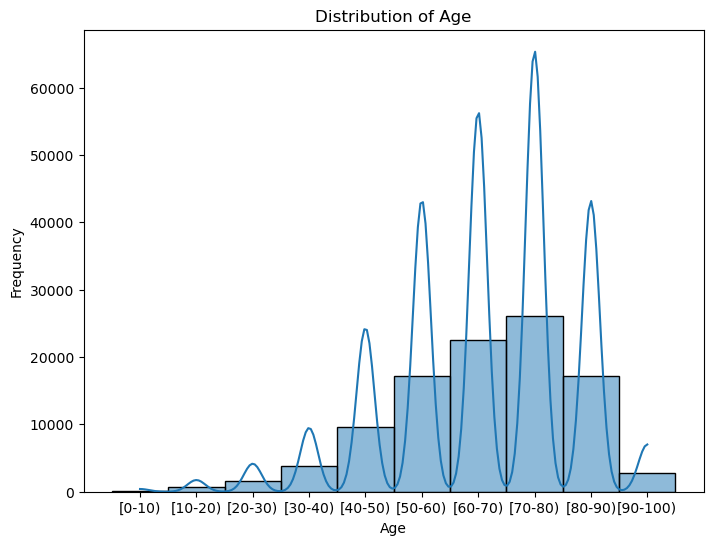

In [12]:
# histogram of a feature 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

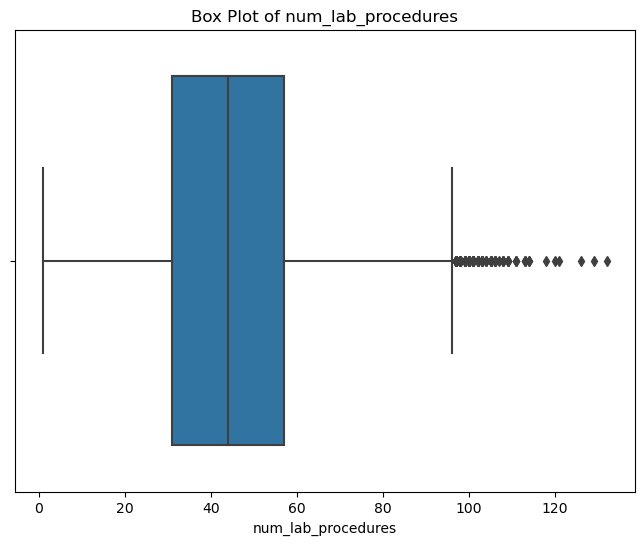

In [13]:
# box plot to detect outliers in 'num_lab_procedures'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['num_lab_procedures'])
plt.title('Box Plot of num_lab_procedures')
plt.xlabel('num_lab_procedures')
plt.show()

##### Feature engineering

In [14]:
# Creating a new feature 'total_procedures' by summing 'num_lab_procedures' and 'num_procedures'
df['total_procedures'] = df['num_lab_procedures'] + df['num_procedures']

In [15]:
print(df['total_procedures'])

0         41
1         59
2         16
3         45
4         51
          ..
101761    51
101762    36
101763    53
101764    47
101765    16
Name: total_procedures, Length: 101766, dtype: int64


In [16]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_procedures
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,44.435371
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,19.846605
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,33.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,45.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,58.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,135.000000


#### There are total 50 features looking into all of these: 

##### 1) encounter_id

In [17]:
df['encounter_id'].nunique()

101766

##### 2) patient_nbr

In [18]:
df['patient_nbr'].nunique()

71518

In [19]:
# drop not useful columns 
columns_to_drop = ['encounter_id', 'patient_nbr']
columns_exist = all(col in df.columns for col in columns_to_drop)

if columns_exist:
    # Drop the columns
    df.drop(columns_to_drop, axis=1, inplace=True)
    print("Columns dropped successfully.")
else:
    print("One or more columns do not exist in the DataFrame.")

Columns dropped successfully.


##### 3) race

In [20]:
# get the count of unique values
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [21]:
# replacing ? with nan
df['race'] = df['race'].replace('?',np.nan)

In [22]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [23]:
# df['race'] = df['race'].fillna(df['race'].mode()[0])
# 

In [24]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

##### 4) gender

In [25]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

###### Unknown/Invalid are missing values,there count is so less so they can be dropped 

In [26]:
df['gender'] = df['gender'].replace('Unknown/Invalid',np.nan)
df['gender'].dropna(inplace=True)

In [27]:
df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

In [28]:
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [29]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [30]:
df['gender'].value_counts()


Female    54711
Male      47055
Name: gender, dtype: int64

In [31]:
df.replace('?', np.nan, inplace=True)

In [32]:
df.isnull().sum()

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

###### 5) Age

In [33]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

###### We can see that most of the population comes under 50 to 80




##### Dealing with age: The dataset only gives ud age as10 year interval, so we don't know the exact age of each patient.
##### We assume that ageof the patient on average lies at the midpoint of the age category. For eg., if the patient's age  category is 40-50 years, then we assume the age = 45 years.SO we converted age categories to midpoints.

In [34]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [35]:
df['age']=df['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35,'[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95})

In [36]:
df.age.value_counts()

75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

###### 6) admission_type_id

In [37]:
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

### Importing ID's mapping CSV

In [38]:
ID_map=pd.read_csv('IDS_mapping.csv')
ID_map.loc[:,['admission_type_id','description']].head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


### According to ID's mapping

##### admission_type_id description:

These 8 values correspond to:
1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Not Available 
6. NULL
7. Trauma Centre
8. Not Mapped

In [39]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',5:'Not Available',6:'Not Available', 8:'Not Available',3:'Elective',4:'Newborn'})

In [40]:
df['admission_type_id'].value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: admission_type_id, dtype: int64

###### dropping Newborn category as it is not giving information v=correct information if we compare it with the age.

In [41]:
df[df.loc[:,'admission_type_id'] == 'Newborn']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_procedures
2043,Caucasian,Male,55,Newborn,1,4,2,56,2,13,0,0,0,414,411,401,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,58
2203,Caucasian,Male,85,Newborn,1,4,2,46,6,14,0,0,0,414,411,401,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,52
2461,AfricanAmerican,Male,75,Newborn,6,4,5,73,1,12,0,0,0,562,428,250.52,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,74
4823,Caucasian,Female,65,Newborn,6,4,2,39,0,7,0,0,0,250.82,707,401,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,39
35877,AfricanAmerican,Male,65,Newborn,1,14,3,66,0,18,0,0,0,276,427,V42,5,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,66
47548,Hispanic,Male,45,Newborn,1,7,6,39,4,7,0,0,0,870,873,873,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,43
48711,Caucasian,Female,75,Newborn,6,1,4,37,1,18,3,0,0,715,272,401,9,None,None,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,38
80354,Hispanic,Female,5,Newborn,1,1,2,27,0,2,0,0,0,786,782,E941,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,27
87714,Caucasian,Male,65,Newborn,1,4,3,28,0,15,0,0,1,435,250,401,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,Steady,No,No,No,No,Ch,Yes,NO,28
100721,Asian,Male,85,Newborn,6,7,3,51,0,10,0,0,0,491,276,250.8,5,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,51


In [42]:
df['admission_type_id'].value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: admission_type_id, dtype: int64

###### 7) discharge_disposition

In [43]:
 value_counts_result = df['discharge_disposition_id'].value_counts()

In [44]:
print(value_counts_result)

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


In [45]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [46]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged',
2:'transferred',
3:'transferred',
4:'transferred',
5:'transferred',
6:'transferred',
7:'Left AMA',
8:'transferred',
9:'Admitted as an inpatient to this hospital',
10:'Neonate discharged',
11:'Expired',
12:'Still patient or expected to return for outpatient services',
13:'Hospice',
14:'Hospice ',
15:'transferred',
16:'Discharged',
17:'transferred',
18:'Not Mapped',
19:'Expired',
20:'Expired',
21:'Expired',
22:'Discharged',
23:'transferred',
24:'transferred',
25:'Not Mapped',
26:'Not Mapped',
30:'transferred',
27:'transferred',
28:'transferred',
29:'transferred'})

In [47]:
df['discharge_disposition_id'].value_counts()

Discharged                                                     62238
transferred                                                    31772
Not Mapped                                                      4680
Expired                                                         1652
Left AMA                                                         623
Hospice                                                          399
Hospice                                                          372
Admitted as an inpatient to this hospital                         21
Neonate discharged                                                 6
Still patient or expected to return for outpatient services        3
Name: discharge_disposition_id, dtype: int64

In [48]:
# filtering

In [49]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

In [50]:
df['discharge_disposition_id'].value_counts()

Discharged                                                     62238
transferred                                                    31772
Not Mapped                                                      4680
Left AMA                                                         623
Hospice                                                          372
Admitted as an inpatient to this hospital                         21
Still patient or expected to return for outpatient services        3
Name: discharge_disposition_id, dtype: int64

In [51]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_procedures'],
      dtype='object')

###### 8) admission_source_id: 

In [52]:
df['admission_source_id'].value_counts()

7     56074
1     29228
17     6639
4      3125
6      2241
2      1081
5       810
3       185
20      159
9       125
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [53]:
df['admission_source_id'].nunique()

17

In [54]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_procedures
0,Caucasian,Female,5,Not Available,Not Mapped,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41
1,Caucasian,Female,15,Emergency,Discharged,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59
2,AfricanAmerican,Female,25,Emergency,Discharged,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,16
3,Caucasian,Male,35,Emergency,Discharged,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,45
4,Caucasian,Male,45,Emergency,Discharged,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51


#### According to ID's mapping:

admission_source-id description

In [55]:
ID_map = pd.read_csv('IDS_mapping.csv')
ID_map.loc[:,['admission_type_id','description']].head(25)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [56]:
df['admission_source_id']= df['admission_source_id'].replace({1:'Referral',2:'Referral',3:'Referral',
                                                              4:'Transferred',5:'Transferred',6:'Transferred',10:'Transferred',18:'Transferred',19:'Transferred',22:'Transferred',25:'Transferred',26:'Transferred',
                                                              7:'Emergency',8:'Emergency',
                                                              9:'Not Available',15:'Not Available',17:'Not Available',20:'Not Available',21:'Not Available',
                                                             11:'Delivery',12:'Delivery',13:'Delivery',14:'Delivery',23:'Delivery',24:'Delivery'})

In [57]:
df['admission_source_id'].value_counts()

Emergency        56089
Referral         30494
Not Available     6923
Transferred       6198
Delivery             5
Name: admission_source_id, dtype: int64

###### Dropping the category Delivery because the admission_source_id == Delivery and the age corresponding to it gives contadictory information.

In [58]:
df= df[df['admission_source_id']!='Delivery']

In [59]:
df['admission_source_id'].value_counts()

Emergency        56089
Referral         30494
Not Available     6923
Transferred       6198
Name: admission_source_id, dtype: int64

In [60]:
df['time_in_hospital'].value_counts(sort=False)

1     13865
3     17477
2     16938
4     13727
5      9782
13     1164
12     1392
9      2896
7      5715
10     2276
6      7390
11     1791
8      4288
14     1003
Name: time_in_hospital, dtype: int64

###### The time in the hospital ranges from 1 Day to 14 Days

##### 10) num_lab_procdures

In [61]:
df['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  28,  48,  10,   2,  65,  67,  40,  54,  58,
        57,  43,  32,  83,  34,  39,  69,  38,  72,  22,  96,  46,  78,
        56,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102,   7,  89,  91,  92,   4, 101,  99, 100,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118], dtype=int64)

In [62]:
print('The number of lab tests a patient has undergone can range from',df.num_lab_procedures.min(),'to',df.num_lab_procedures.max())

The number of lab tests a patient has undergone can range from 1 to 132


##### 11) num_procedures

In [63]:
df.num_procedures.value_counts()

0    45887
1    20337
2    12403
3     9219
6     4806
4     4059
5     2993
Name: num_procedures, dtype: int64

##### 12) num_medications

In [64]:
print('The number of medications range from a minimum of',df.num_medications.min(),'to',df.num_medications.max())

The number of medications range from a minimum of 1 to 81


In [65]:
df.num_medications.value_counts()

13    5990
12    5909
11    5713
15    5713
14    5605
      ... 
70       2
75       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64

##### 13)number_outpatient

In [66]:
print('The number of outpatients range from a minimum of',df.number_outpatient.min(),'to',df.number_outpatient.max())

The number of outpatients range from a minimum of 0 to 42


In [67]:
df.number_outpatient.value_counts()

0     83266
1      8387
2      3533
3      2010
4      1081
5       516
6       300
7       154
8        98
9        82
10       57
11       41
13       30
12       29
14       28
15       20
16       13
17        8
21        6
20        6
18        5
22        5
19        3
27        3
24        3
26        2
23        2
33        2
35        2
36        2
29        2
39        1
34        1
42        1
25        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

##### 14) number_emergency

In [68]:
print('The number of emergency range from a minimum of',df.number_emergency.min(),'to',df.number_emergency.max())

The number of emergency range from a minimum of 0 to 76


In [69]:
df.number_emergency.value_counts()

0     88561
1      7505
2      1999
3       708
4       370
5       190
6        93
7        72
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

##### 15) number_inpatient

In [70]:
print('The number of inpatient range from a minimum of',df.number_inpatient.min(),'to',df.number_inpatient.max())

The number of inpatient range from a minimum of 0 to 21


In [71]:
df.number_inpatient.value_counts()

0     66447
1     19055
2      7342
3      3299
4      1582
5       798
6       475
7       262
8       146
9       110
10       59
11       49
12       32
13       18
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

##### 16) service_utilization

In [72]:
df['service_utilization']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']#year_visits

######  This sum represents the total number of healthcare encounters (outpatient visits, emergency room visits, and inpatient stays) that a patient had.

In [73]:
df.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1,inplace=True)

In [74]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_procedures', 'service_utilization'],
      dtype='object')

In [75]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_procedures,service_utilization
0,Caucasian,Female,5,Not Available,Not Mapped,Referral,1,41,0,1,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0
1,Caucasian,Female,15,Emergency,Discharged,Emergency,3,59,0,18,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0
2,AfricanAmerican,Female,25,Emergency,Discharged,Emergency,2,11,5,13,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,16,3
3,Caucasian,Male,35,Emergency,Discharged,Emergency,2,44,1,16,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,45,0
4,Caucasian,Male,45,Emergency,Discharged,Emergency,1,51,0,8,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0


In [76]:
  df.isnull().sum()

race                        2237
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
diag_1                        20
diag_2                       357
diag_3                      1420
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide

##### Treating missing values in dia_1, dia_2, dia_3 by dropping all the missing values

In [77]:
# dia_1,dia_2,dia_3
df=df.dropna(subset=['diag_1','diag_2','diag_3'])

In [78]:
df.isnull().sum()

race                        2155
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide

In [79]:
df['number_diagnoses'].value_counts()

9     48060
5     11175
8     10343
7     10227
6      9997
4      5469
3      2804
16       42
10       17
13       16
11       11
15       10
12        8
14        6
Name: number_diagnoses, dtype: int64

In [80]:
df.max_glu_serum.value_counts()

None    93059
Norm     2528
>200     1415
>300     1183
Name: max_glu_serum, dtype: int64

###### It indicates that the range of the result of the test was not taken. Values:">200" ">300", "normal" and "none" if not measured
###### We also reduce Glucose serum test result into categories of Normal(1), Abnormal(2) and Not Tested(0)

In [81]:
df['max_glu_serum']= df['max_glu_serum'].replace({">200":2,
                                                 ">300":2,
                                                 "Norm":1,
                                                 "None":0})

In [82]:
df.max_glu_serum.value_counts()

0    93059
2     2598
1     2528
Name: max_glu_serum, dtype: int64

### Encoding

#### Outcome Variable
###### The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

In [83]:
#Encoding the data,

def generate_code_mapping():
    
    list =[('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))] # Your code ranges here
    code_mapping = {}
    count = 1
    for name, num in list:
        for _ in range(num):
            code_mapping[str(count)] = name
            count += 1
    return code_mapping

def encode_diagnosis(df, codes):
    def get_category(num):
        if not num or num in ['unknown', '?']:
            return 'unknown'
        elif num.upper()[0] == 'V':
            return 'supplemental'
        elif num.upper()[0] == 'E':
            return 'injury'
        else:
            lookup = num.split('.')[0]
            return codes.get(lookup, 'unknown')
    
    for col in df.columns:
        df.loc[:, col] = [get_category(num) for num in df[col]] 
    
    return df

codes = generate_code_mapping()
listcol = ['diag_1', 'diag_2', 'diag_3']
df[listcol] = encode_diagnosis(df[listcol], codes)


##### The code mapping provides a way to convert individual codes to their respective categories.
##### This preprocessing allows for more meaningful insights to be derived from the dataset, which can ultimately lead to better decision-making in a clinical or research setting.

In [84]:
df['readmitted'].value_counts()

NO     51821
>30    35133
<30    11231
Name: readmitted, dtype: int64

In [85]:
# readmission converting multiclass to binary class
df['readmitted']= df['readmitted'].replace({'>30':0, 'NO':0, '<30':1})

In [86]:
df['readmitted'].value_counts()

0    86954
1    11231
Name: readmitted, dtype: int64

### A1Cresult

##### A1c test result indicates the range of the result or if the test was not taken. Values: ">8" if the result was greater than 8%, ">7" if the result was greater than 7% but less than 8%, "normal" if the result was less than 7%, and "none" if not measured. 

In [87]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [88]:
df['A1Cresult'].value_counts()

None    81748
>8       7806
Norm     4876
>7       3755
Name: A1Cresult, dtype: int64

###### A normal A1c level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, the higher your A1C, the greater your risk is for developing type 2 diabetes.

In [89]:
df['A1Cresult']= df['A1Cresult'].replace({'None':0, 'Norm':1,'>7':2,'>8':2})

In [90]:
df['A1Cresult'].unique()


array([0, 2, 1], dtype=int64)

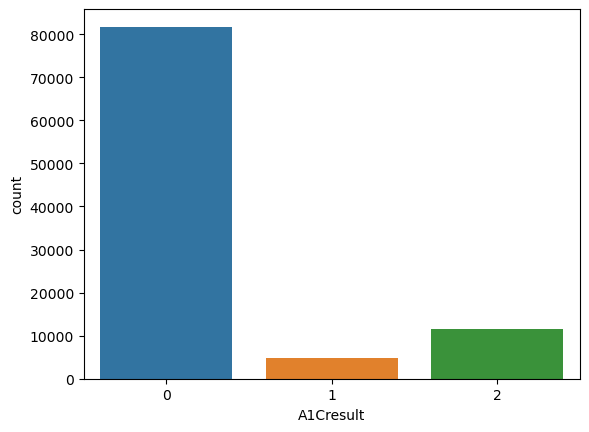

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='A1Cresult')
plt.show()


In [92]:
df['gender']=df['gender'].replace({'Female':0, 'Male':1})

###### Change in medications indicates if there was a change in diabetic medications. Values: "change" and "no change"

In [93]:
df['change'].value_counts()

No    52576
Ch    45609
Name: change, dtype: int64

###### encoded the "medication change" feature from "No"(no change) and "Ch"(changed) into 0 and 1.

In [94]:
df['change'] = df['change'].replace({'No':0, 'Ch':1})

###### diabetesMed: indicated if there was any diabetic medication prescribed. Values:'yes' and 'no'. 

In [95]:
df['diabetesMed'].value_counts()

Yes    75769
No     22416
Name: diabetesMed, dtype: int64

In [96]:
# encoding diabetesMed
df['diabetesMed'] = df['diabetesMed'].replace('Yes',1)
df['diabetesMed'] = df['diabetesMed'].replace('No',0)

In [97]:
df['diabetesMed'].value_counts()

1    75769
0    22416
Name: diabetesMed, dtype: int64

In [98]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_procedures', 'service_utilization'],
      dtype='object')

##### 23 features for medications For the generic names: metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone, the feature indicated whether the drug was prescribed or there was a chane in the dosage.
##### Values: 'up' if the dosage was increased during the encounter, 'down' if the dosage was decreased, 'steady' if the dosage did not change, and 'no' if the drug was not prescribed

In [99]:
drug=list(df.iloc[:,16:39].columns)
drug

['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [100]:
for i in drug:
    print(i,df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['Up' 'No' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


metformin
Axes(0.125,0.11;0.775x0.77)


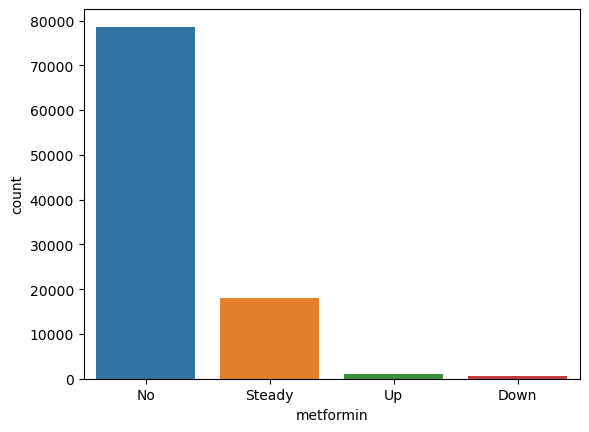

repaglinide
Axes(0.125,0.11;0.775x0.77)


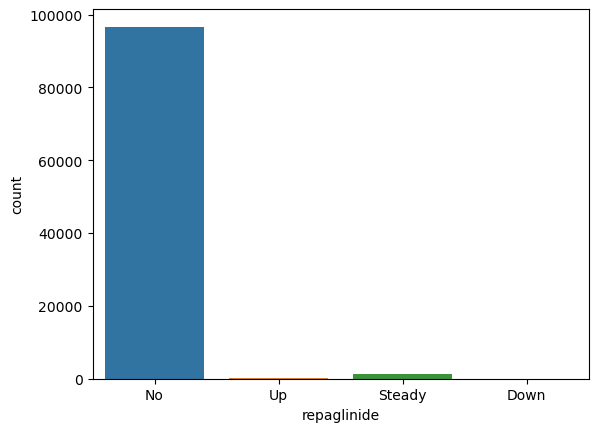

nateglinide
Axes(0.125,0.11;0.775x0.77)


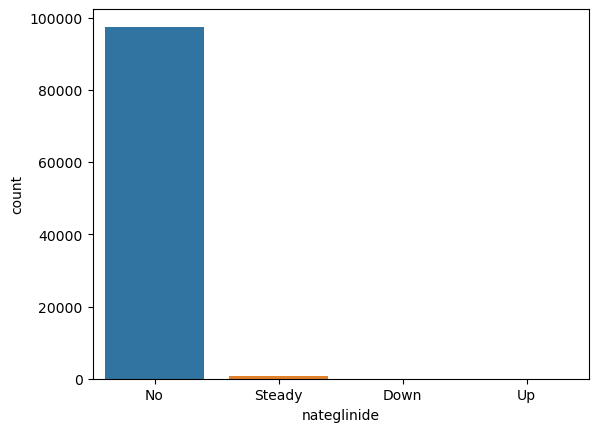

chlorpropamide
Axes(0.125,0.11;0.775x0.77)


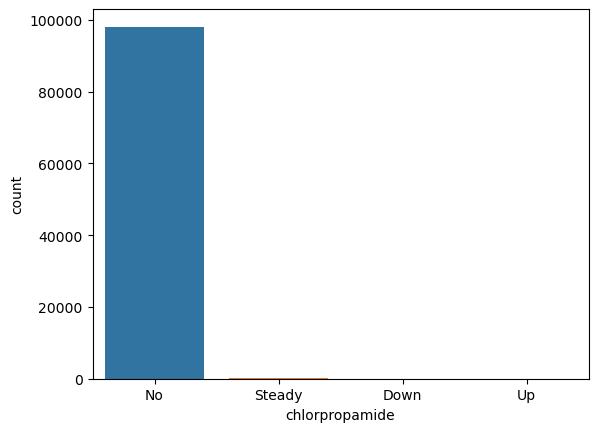

glimepiride
Axes(0.125,0.11;0.775x0.77)


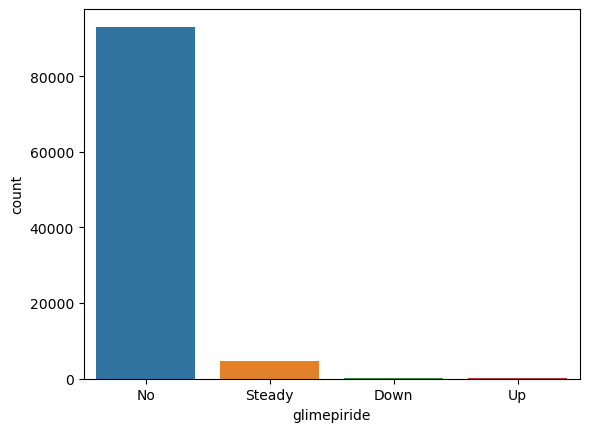

acetohexamide
Axes(0.125,0.11;0.775x0.77)


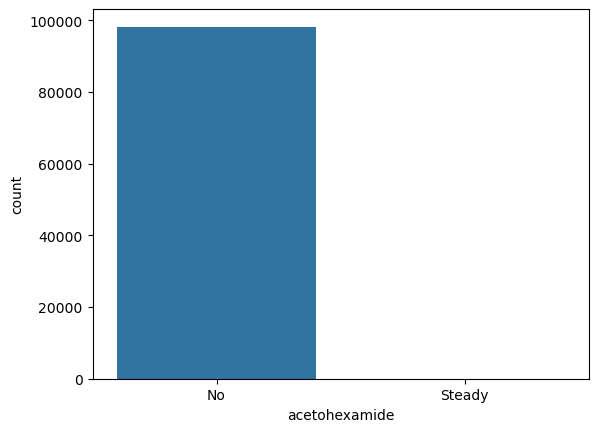

glipizide
Axes(0.125,0.11;0.775x0.77)


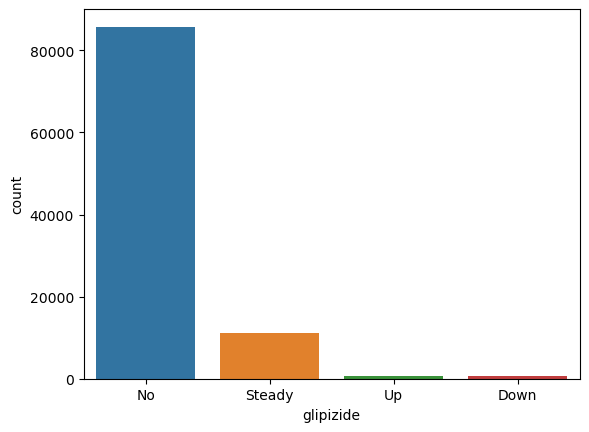

glyburide
Axes(0.125,0.11;0.775x0.77)


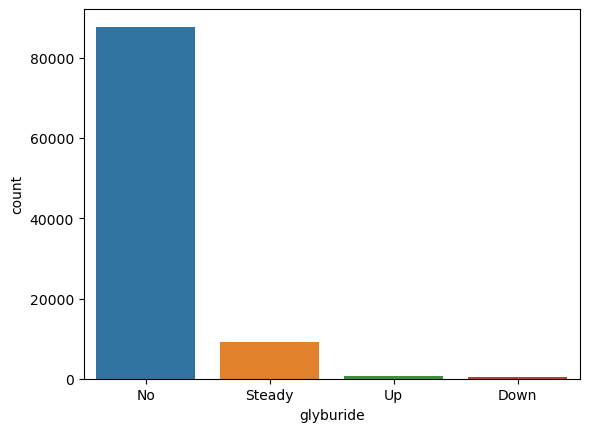

tolbutamide
Axes(0.125,0.11;0.775x0.77)


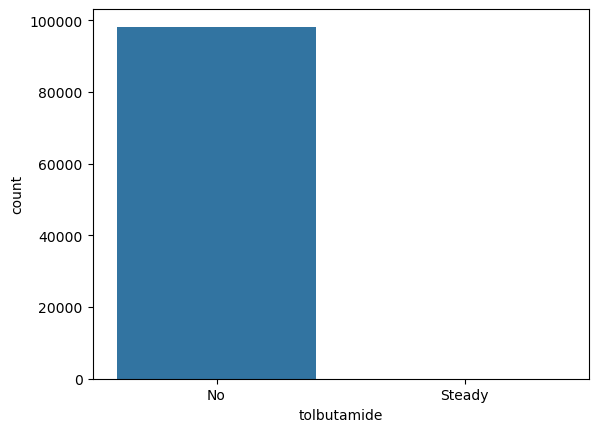

pioglitazone
Axes(0.125,0.11;0.775x0.77)


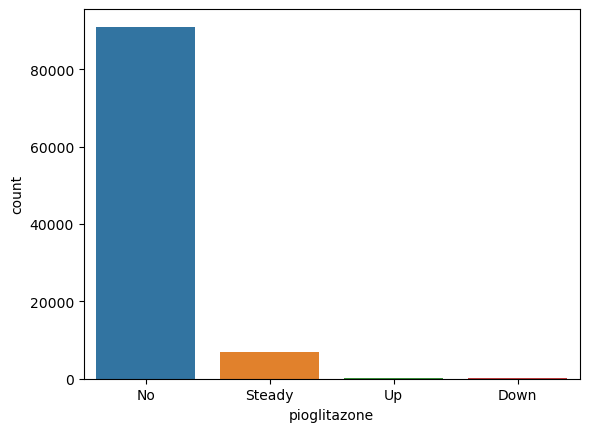

rosiglitazone
Axes(0.125,0.11;0.775x0.77)


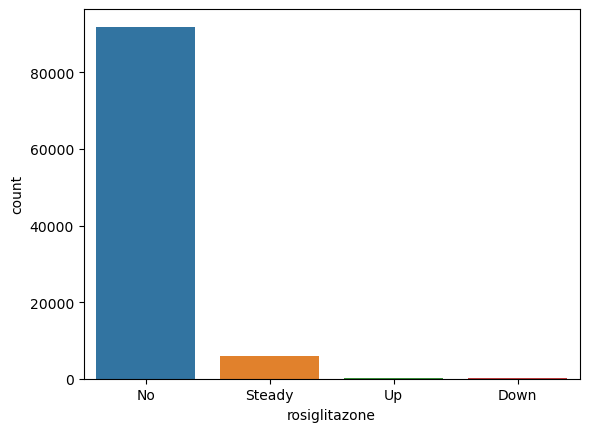

acarbose
Axes(0.125,0.11;0.775x0.77)


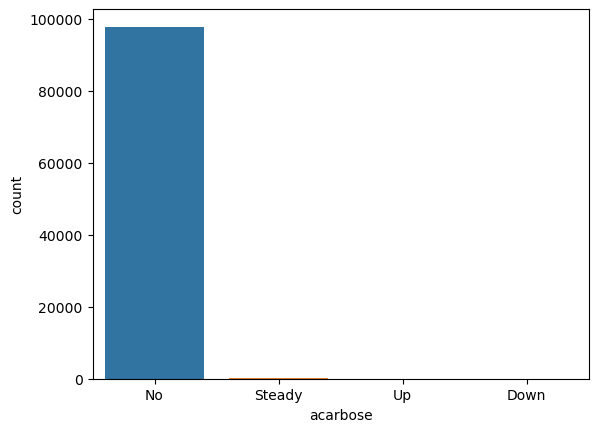

miglitol
Axes(0.125,0.11;0.775x0.77)


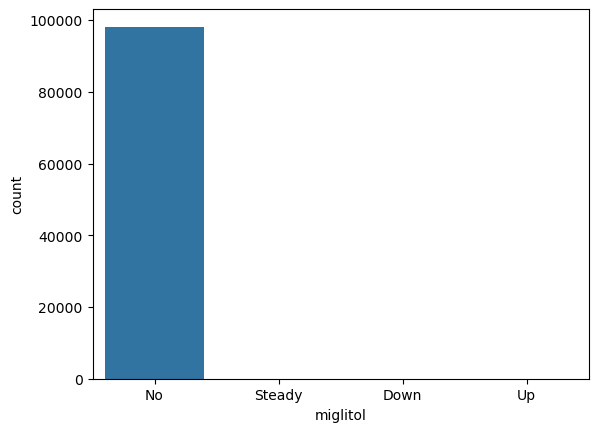

troglitazone
Axes(0.125,0.11;0.775x0.77)


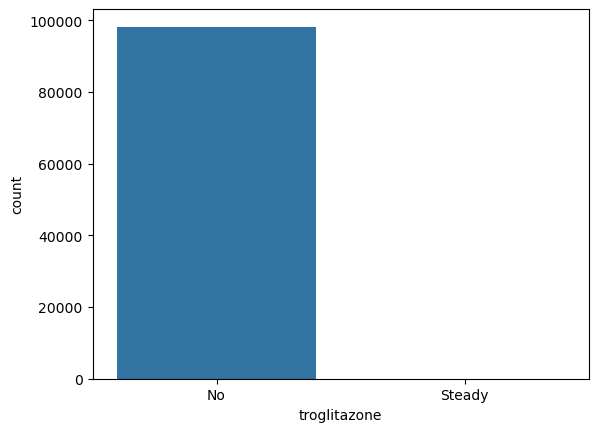

tolazamide
Axes(0.125,0.11;0.775x0.77)


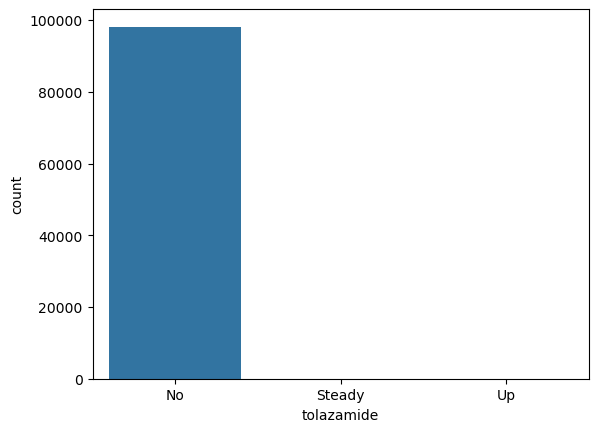

examide
Axes(0.125,0.11;0.775x0.77)


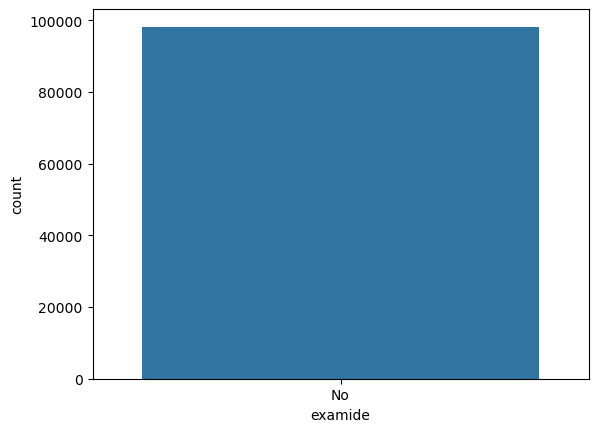

citoglipton
Axes(0.125,0.11;0.775x0.77)


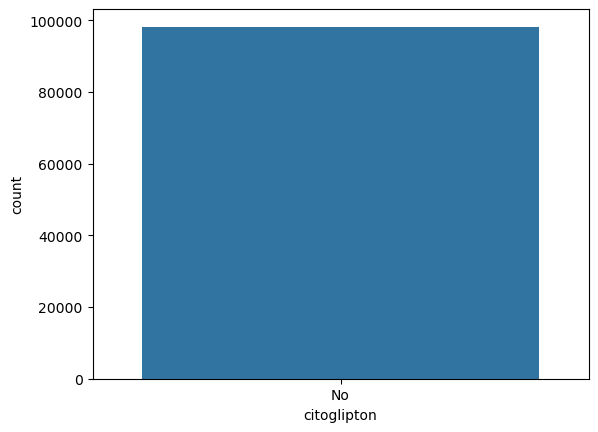

insulin
Axes(0.125,0.11;0.775x0.77)


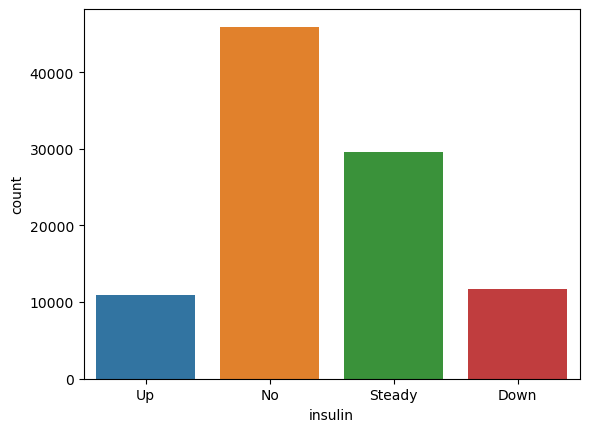

glyburide-metformin
Axes(0.125,0.11;0.775x0.77)


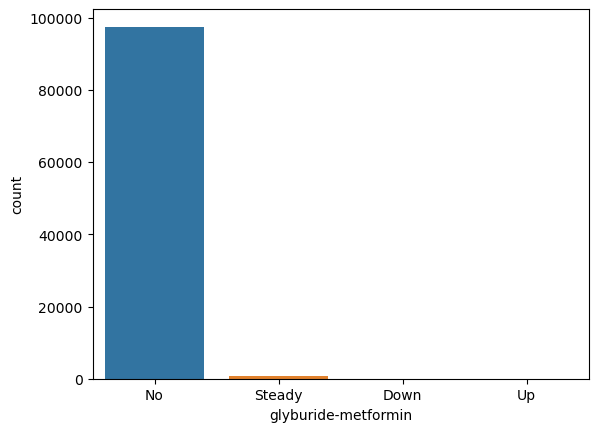

glipizide-metformin
Axes(0.125,0.11;0.775x0.77)


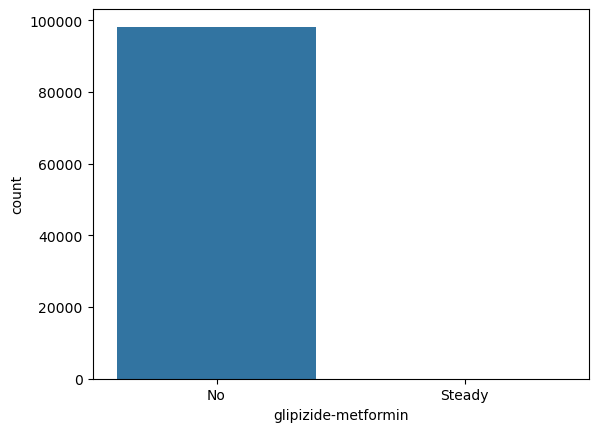

glimepiride-pioglitazone
Axes(0.125,0.11;0.775x0.77)


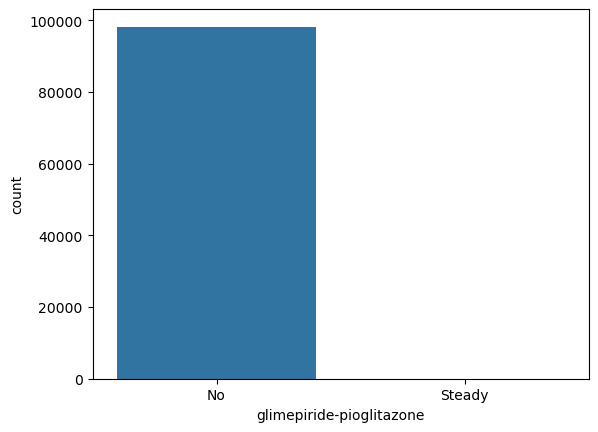

metformin-rosiglitazone
Axes(0.125,0.11;0.775x0.77)


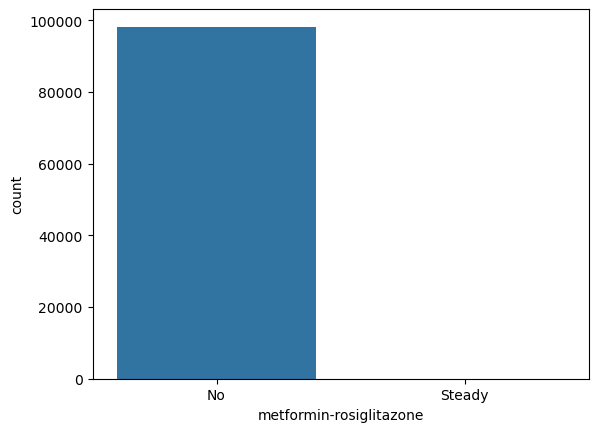

metformin-pioglitazone
Axes(0.125,0.11;0.775x0.77)


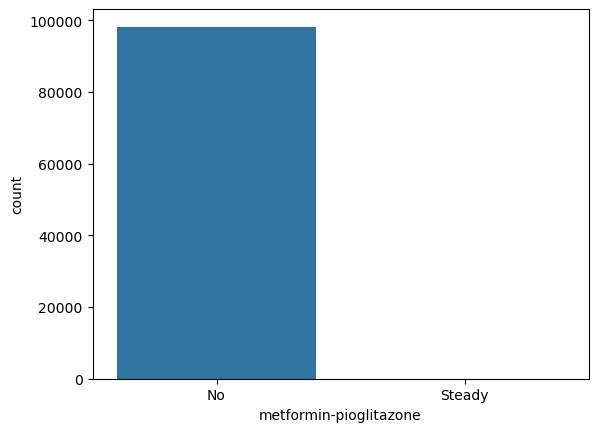

In [101]:
 for i in drug:
        print(i)
        print(sns.countplot(data=df, x=i))
        plt.show()

##### variables (drug named citoglipton and examide), all records have these the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two varibales

In [102]:
df['citoglipton'].value_counts()

No    98185
Name: citoglipton, dtype: int64

In [103]:
df['examide'].value_counts()

No    98185
Name: examide, dtype: int64

In [104]:
df= df.drop(['citoglipton','examide'],axis=1)

In [105]:
l1=['metformin','glipizide','insulin','glyburide']

metformin
Axes(0.125,0.11;0.775x0.77)


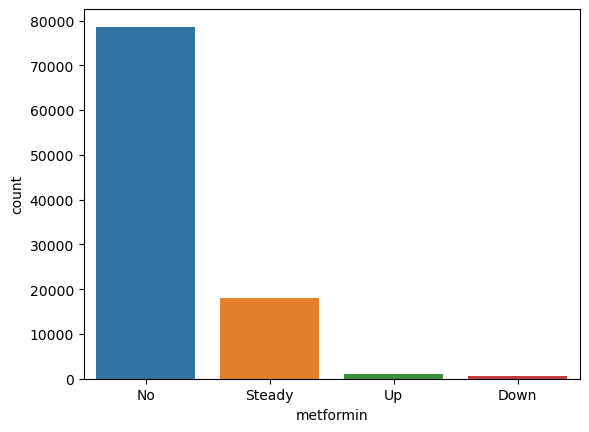

glipizide
Axes(0.125,0.11;0.775x0.77)


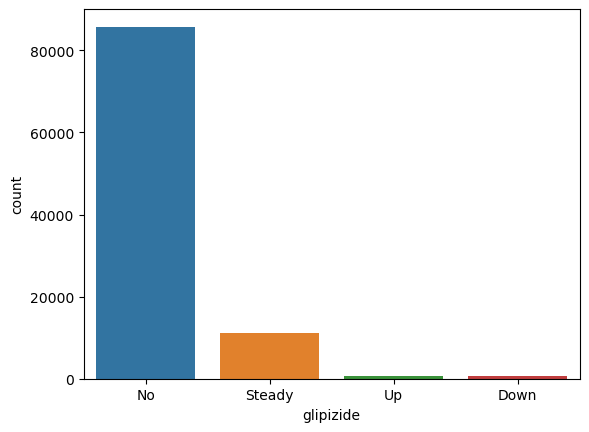

insulin
Axes(0.125,0.11;0.775x0.77)


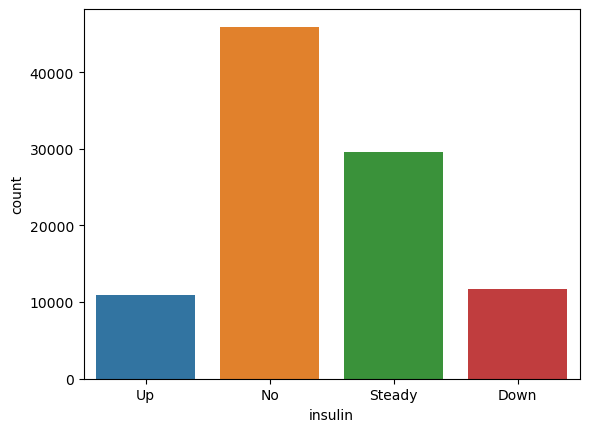

glyburide
Axes(0.125,0.11;0.775x0.77)


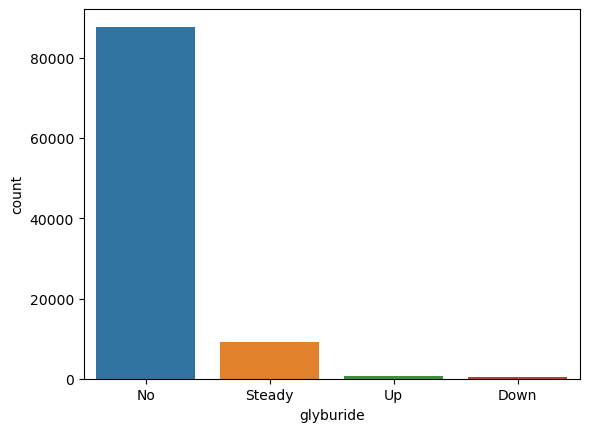

In [106]:
for i in l1:
    print(i)
    print(sns.countplot(data=df,x=i))
    plt.show()

In [107]:
df = df.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

KeyError: "['encounter_id', 'patient_nbr'] not found in axis"

In [108]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_procedures,service_utilization
1,Caucasian,0,15,Emergency,Discharged,Emergency,3,59,0,18,endocrine,endocrine,endocrine,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,0,59,0
2,AfricanAmerican,0,25,Emergency,Discharged,Emergency,2,11,5,13,pregnancy,endocrine,supplemental,6,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,16,3
3,Caucasian,1,35,Emergency,Discharged,Emergency,2,44,1,16,infections,endocrine,circulatory,7,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,0,45,0
4,Caucasian,1,45,Emergency,Discharged,Emergency,1,51,0,8,neoplasms,neoplasms,endocrine,5,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,1,1,0,51,0
5,Caucasian,1,55,Emergency,Discharged,Referral,3,31,6,16,circulatory,circulatory,endocrine,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,0,1,0,37,0


In [109]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

df[listnormal] = normal.fit_transform(df[listnormal])

df.describe()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_procedures,service_utilization
count,98185.000000,98185.000000,9.818500e+04,9.818500e+04,9.818500e+04,9.818500e+04,9.818500e+04,98185.000000,98185.000000,98185.000000,98185.000000,98185.000000,98185.000000,98185.000000
mean,0.461567,66.107297,-9.263072e-18,-1.441566e-16,-7.786770e-17,2.072612e-16,-1.621038e-16,0.078668,0.285156,0.464521,0.771696,0.114386,44.344065,1.208749
std,0.498523,15.591823,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.354120,0.662828,0.498742,0.419741,0.318281,19.799819,2.299996
min,0.000000,5.000000,-1.144403e+00,-2.138845e+00,-7.867855e-01,-1.865066e+00,-2.429188e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,55.000000,-8.086015e-01,-6.111385e-01,-7.867855e-01,-6.280428e-01,-8.028515e-01,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000
50%,0.000000,65.000000,-1.369985e-01,5.086753e-02,-2.009284e-01,-1.332334e-01,2.813727e-01,0.000000,0.000000,0.000000,1.000000,0.000000,45.000000,0.000000
75%,1.000000,75.000000,5.346045e-01,7.128736e-01,3.849288e-01,4.852783e-01,8.234847e-01,0.000000,0.000000,1.000000,1.000000,0.000000,58.000000,2.000000
max,1.000000,95.000000,3.221016e+00,4.532139e+00,2.728357e+00,8.031121e+00,4.618269e+00,2.000000,2.000000,1.000000,1.000000,1.000000,135.000000,80.000000


In [110]:
for i in l1:
    print(i)
    print((df[i].value_counts(normalize=True)*100))

metformin
No        80.064165
Steady    18.301166
Up         1.061262
Down       0.573407
Name: metformin, dtype: float64
glipizide
No        87.341244
Steady    11.326577
Up         0.776086
Down       0.556093
Name: glipizide, dtype: float64
insulin
No        46.779040
Steady    30.157356
Down      11.972297
Up        11.091307
Name: insulin, dtype: float64
glyburide
No        89.393492
Steady     9.231553
Up         0.812751
Down       0.562204
Name: glyburide, dtype: float64


In [111]:
for i in l1:
    df[i]=df[i].apply(lambda x: 0 if (x== 'No' or x== 'Steady') else 1)

In [112]:
 df.insulin.value_counts() 

0    75540
1    22645
Name: insulin, dtype: int64

In [113]:
# dropping rest of the medication columns
df= df.drop(['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone' ],axis=1)

In [114]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_procedures,service_utilization
1,Caucasian,0,15,Emergency,Discharged,Emergency,-0.472800,0.814721,-0.786786,0.237874,endocrine,endocrine,endocrine,0.823485,0,0,1,1,0,59,0
2,AfricanAmerican,0,25,Emergency,Discharged,Emergency,-0.808602,-1.629609,2.142500,-0.380638,pregnancy,endocrine,supplemental,-0.802852,0,0,0,1,0,16,3
3,Caucasian,1,35,Emergency,Discharged,Emergency,-0.808602,0.050868,-0.200928,-0.009531,infections,endocrine,circulatory,-0.260739,0,0,1,1,0,45,0
4,Caucasian,1,45,Emergency,Discharged,Emergency,-1.144403,0.407332,-0.786786,-0.999150,neoplasms,neoplasms,endocrine,-1.344964,0,0,1,1,0,51,0
5,Caucasian,1,55,Emergency,Discharged,Referral,-0.472800,-0.611139,2.728357,-0.009531,circulatory,circulatory,endocrine,0.823485,0,0,0,1,0,37,0


In [115]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

<Axes: xlabel='count', ylabel='race'>

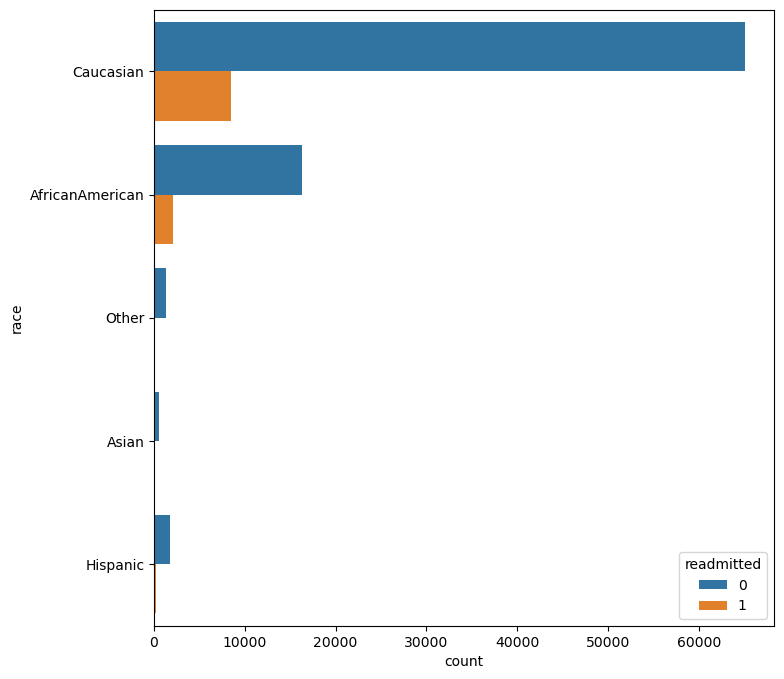

In [116]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

In [117]:
race_dummies = pd.get_dummies(df['race'],drop_first=True)
race_dummies.head()

,Asian,Caucasian,Hispanic,Other
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0


In [118]:
# preparing the DataFrame df for modeling by adding one-hot encoded columns for race (presumably stored in race_dummies) and removing the original 'race' column  to prevent multicollinearity (redundancy) in the dataset. 

In [119]:
df = pd.concat([df, race_dummies],axis=1)
df.drop(['race'],inplace=True, axis=1)
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_procedures,service_utilization,Asian,Caucasian,Hispanic,Other
1,0,15,Emergency,Discharged,Emergency,-0.472800,0.814721,-0.786786,0.237874,endocrine,endocrine,endocrine,0.823485,0,0,1,1,0,59,0,0,1,0,0
2,0,25,Emergency,Discharged,Emergency,-0.808602,-1.629609,2.142500,-0.380638,pregnancy,endocrine,supplemental,-0.802852,0,0,0,1,0,16,3,0,0,0,0
3,1,35,Emergency,Discharged,Emergency,-0.808602,0.050868,-0.200928,-0.009531,infections,endocrine,circulatory,-0.260739,0,0,1,1,0,45,0,0,1,0,0
4,1,45,Emergency,Discharged,Emergency,-1.144403,0.407332,-0.786786,-0.999150,neoplasms,neoplasms,endocrine,-1.344964,0,0,1,1,0,51,0,0,1,0,0
5,1,55,Emergency,Discharged,Referral,-0.472800,-0.611139,2.728357,-0.009531,circulatory,circulatory,endocrine,0.823485,0,0,0,1,0,37,0,0,1,0,0


In [120]:
#Let's store readmitted in y and rest of the columns in X,

Y = df['readmitted']
X = df.drop(['readmitted'], axis =1)
X = pd.get_dummies(X)

Text(0.5, 1.0, 'Gender of patient vs. Readmission')

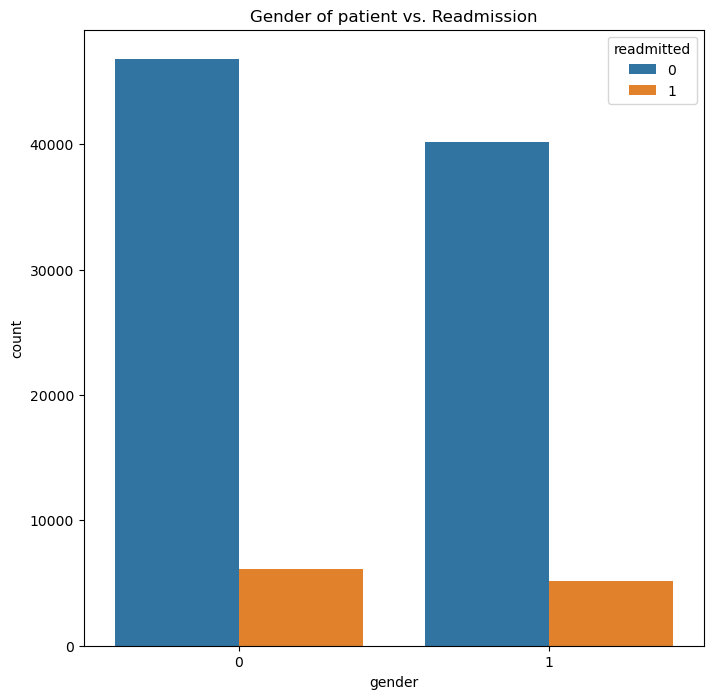

In [121]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data=df, x='gender', hue='readmitted').set_title('Gender of patient vs. Readmission')

##### - cleaned dataset

#### Splitting the data into training and vallidation data sets. The training data will contain 80 % of the data and validation will contain remaining 20%

In [122]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [127]:
# from sklearn.model_selection import train_test_split

# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
#                                                 random_state = 7, stratify = Y)
from sklearn.model_selection import train_test_split

Xtrain, X_rest, Ytrain, y_rest = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=7, stratify=y_rest)


In [128]:
# Apply SMOTE
smote = SMOTE(random_state=42)
Xtrain_smote, Ytrain_smote = smote.fit_resample(Xtrain, Ytrain)


In [129]:
# Train
clf = RandomForestClassifier(random_state=42)
clf.fit(Xtrain_smote, Ytrain_smote)


RandomForestClassifier(random_state=42)

In [131]:
# Make predictions on the test data
Ypred = clf.predict(X_test)

In [135]:
print("shape of Xtrain,Xtest:",Xtrain.shape,X_test.shape)

shape of Xtrain,Xtest: (68729, 86) (14728, 86)


##### Modelling

### Logistic Regression

##### Logistic regression is a statistical method used for analyzing a dataset in which there are one or more independent variables that can be used to predict the outcome of a categorical dependent variable. It is primarily used for binary classification problems, where the outcome variable has two possible classes.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [146]:
Y = df['readmitted']
X1 = df.drop(['readmitted'], axis =1)
X1 = pd.get_dummies(X1)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.35, random_state=42, stratify=Y)

In [147]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [148]:
y_probs = logistic_model.predict_proba(X_test)[:, 1]

In [164]:
new_threshold = 0.063
y_pred_adjusted = (y_probs >= new_threshold).astype(int)


In [165]:
report = classification_report(y_test, y_pred_adjusted)
print(report)

accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

              precision    recall  f1-score   support

           0       0.96      0.04      0.08     30434
           1       0.12      0.99      0.21      3931

    accuracy                           0.15     34365
   macro avg       0.54      0.51      0.14     34365
weighted avg       0.86      0.15      0.09     34365

Accuracy: 0.14829041175614724
Precision: 0.11725075528700907
Recall: 0.9872805901806156


In [168]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

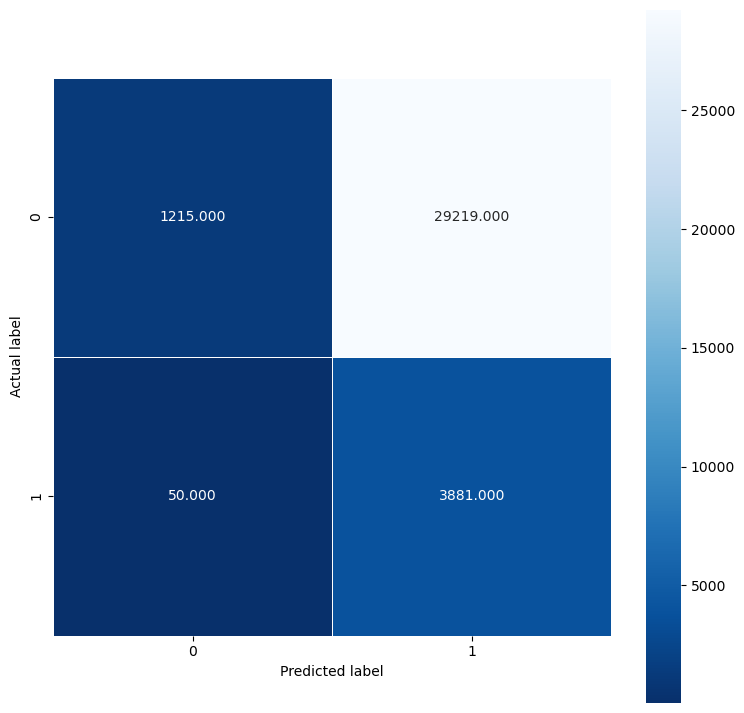

In [169]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Classifier

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [172]:
Y = df['readmitted']
X1 = df.drop(['readmitted'], axis =1)
X1 = pd.get_dummies(X1)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.35, random_state=42, stratify=Y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [174]:
y_probs = rf_model.predict_proba(X_test)[:, 1]

In [179]:
new_threshold = 0.063 
y_pred_adjusted = (y_probs >= new_threshold).astype(int)

In [180]:
report = classification_report(y_test, y_pred_adjusted)
print(report)

accuracy = accuracy_score(y_test,y_pred_adjusted)
precision = precision_score(y_test,y_pred_adjusted)
recall = recall_score(y_test,y_pred_adjusted)
print('Accuracy',accuracy)
print('Precision ',precision)
print('the recall value is',recall)

              precision    recall  f1-score   support

           0       0.93      0.23      0.37     30434
           1       0.13      0.86      0.22      3931

    accuracy                           0.30     34365
   macro avg       0.53      0.55      0.30     34365
weighted avg       0.84      0.30      0.35     34365

Accuracy 0.30373926960570347
Precision  0.12635473503251365
the recall value is 0.8600864919867718


In [184]:
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

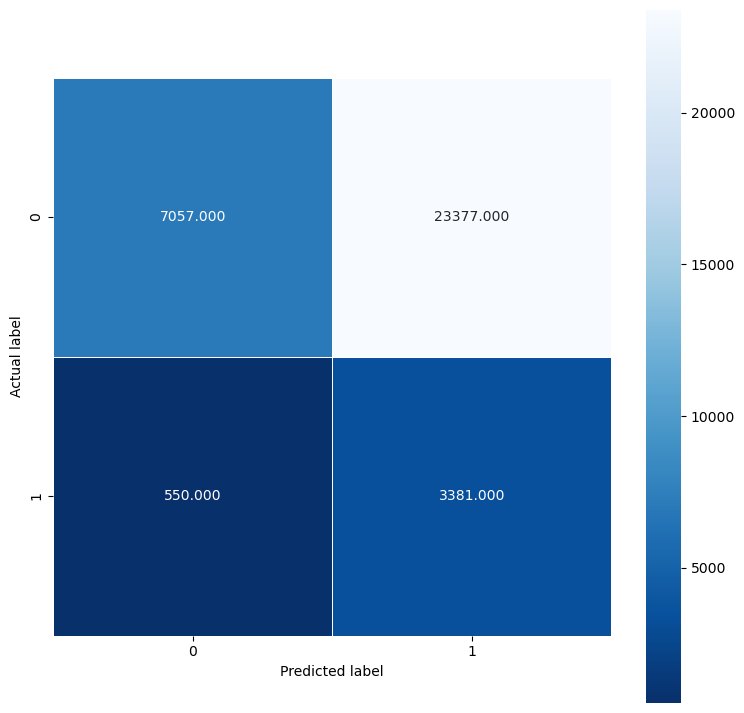

In [185]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

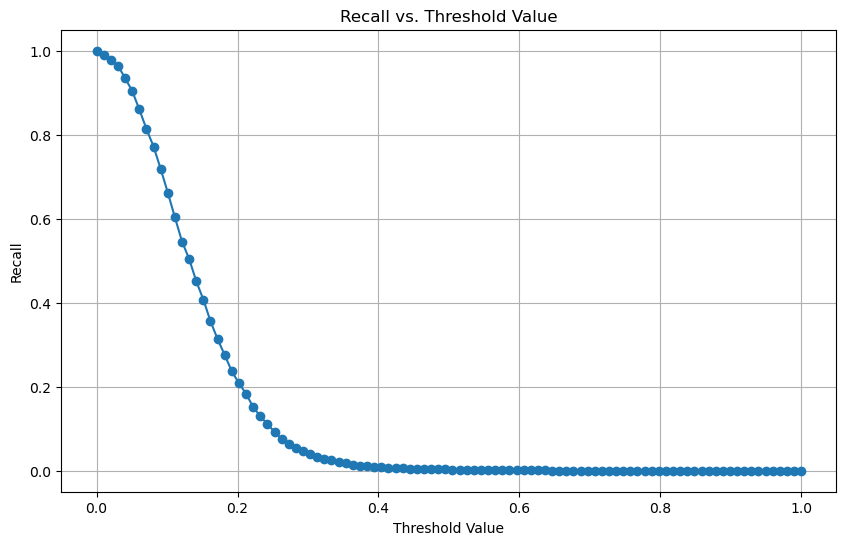

In [186]:
from sklearn.metrics import recall_score

thresholds = np.linspace(0, 1, 100)  

recall_values = []

# Calculate recall 
for threshold in thresholds:
    y_pred_new = (y_probs >= threshold).astype(int)

    recall = recall_score(y_test, y_pred_new)
    recall_values.append(recall)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_values, marker='o', linestyle='-')
plt.xlabel("Threshold Value")
plt.ylabel("Recall")
plt.title("Recall vs. Threshold Value")
plt.grid(True)
plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     30434
           1       0.11      1.00      0.21      3931

    accuracy                           0.11     34365
   macro avg       0.06      0.50      0.10     34365
weighted avg       0.01      0.11      0.02     34365

Accuracy: 0.11438964062272661
Precision: 0.11438964062272661
Recall: 1.0


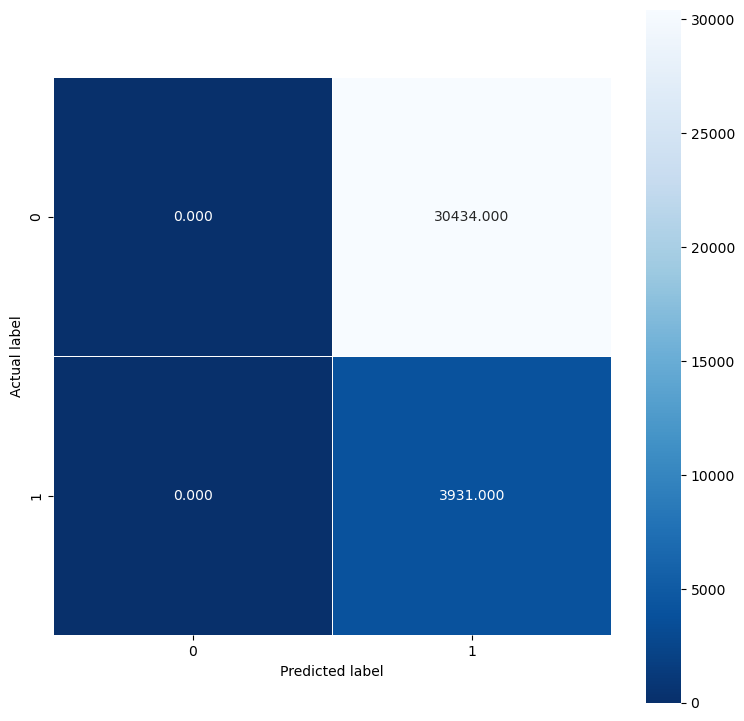

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.35, random_state=42, stratify=Y)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_probs = logistic_model.predict_proba(X_test)[:, 1]

new_threshold = -0.0
y_pred_adjusted = (y_probs >= new_threshold).astype(int)

report = classification_report(y_test, y_pred_adjusted)
print(report)

accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
